In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ticktack
from jax import jit
import jax.numpy as jnp
from ticktack import fitting, resample
from scipy.interpolate import interp1d
plt.rcParams['figure.figsize'] = (8.0, 6.0)
#from helper import run_resample, load_IntCal20
import pandas as pd
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d

In [3]:
data = pd.read_csv("../data/Miyahara.csv")

<ErrorbarContainer object of 3 artists>

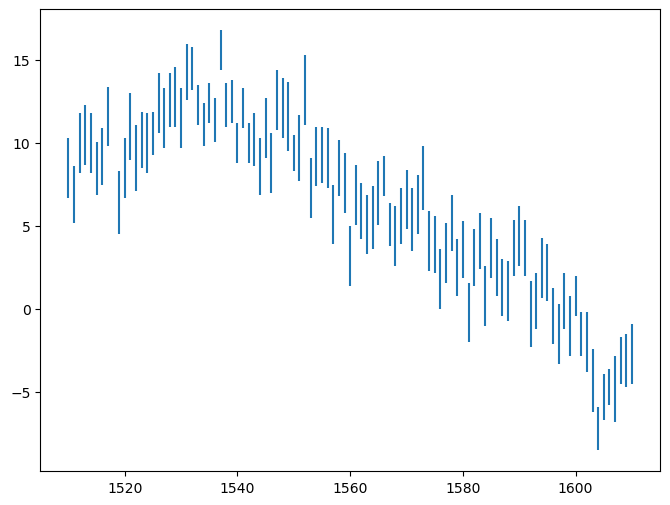

In [4]:
plt.errorbar(data.year, data.d14c, yerr=data.sig_d14c, linestyle='None')

In [5]:
resampler = resample.Resampler()
resampler.load_data(data.year, data.d14c, data.sig_d14c)
resampler.annual = np.arange(np.ceil(resampler.start), np.floor(resampler.end + 1))
new_signal = resampler.signal_resample()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [6]:
f = interp1d(resampler.x, resampler.y, kind="cubic")
interpolation = f(resampler.annual)
sig = resampler.bandpass_super_gaussian(interpolation, l=1./9.677, sz=0.05, order=30)

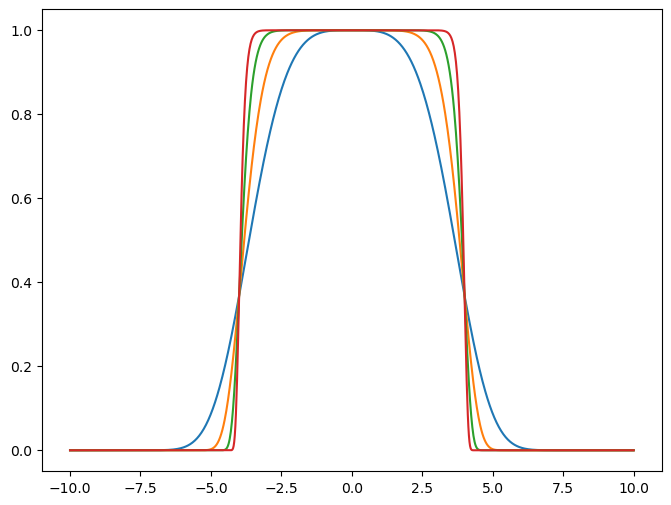

In [7]:
xx = np.linspace(-10,10,1000)

for order in [4, 8, 16, 32]:
    yy = resampler.super_gaussian(xx,sz=4,order=order)
    plt.plot(xx,yy)

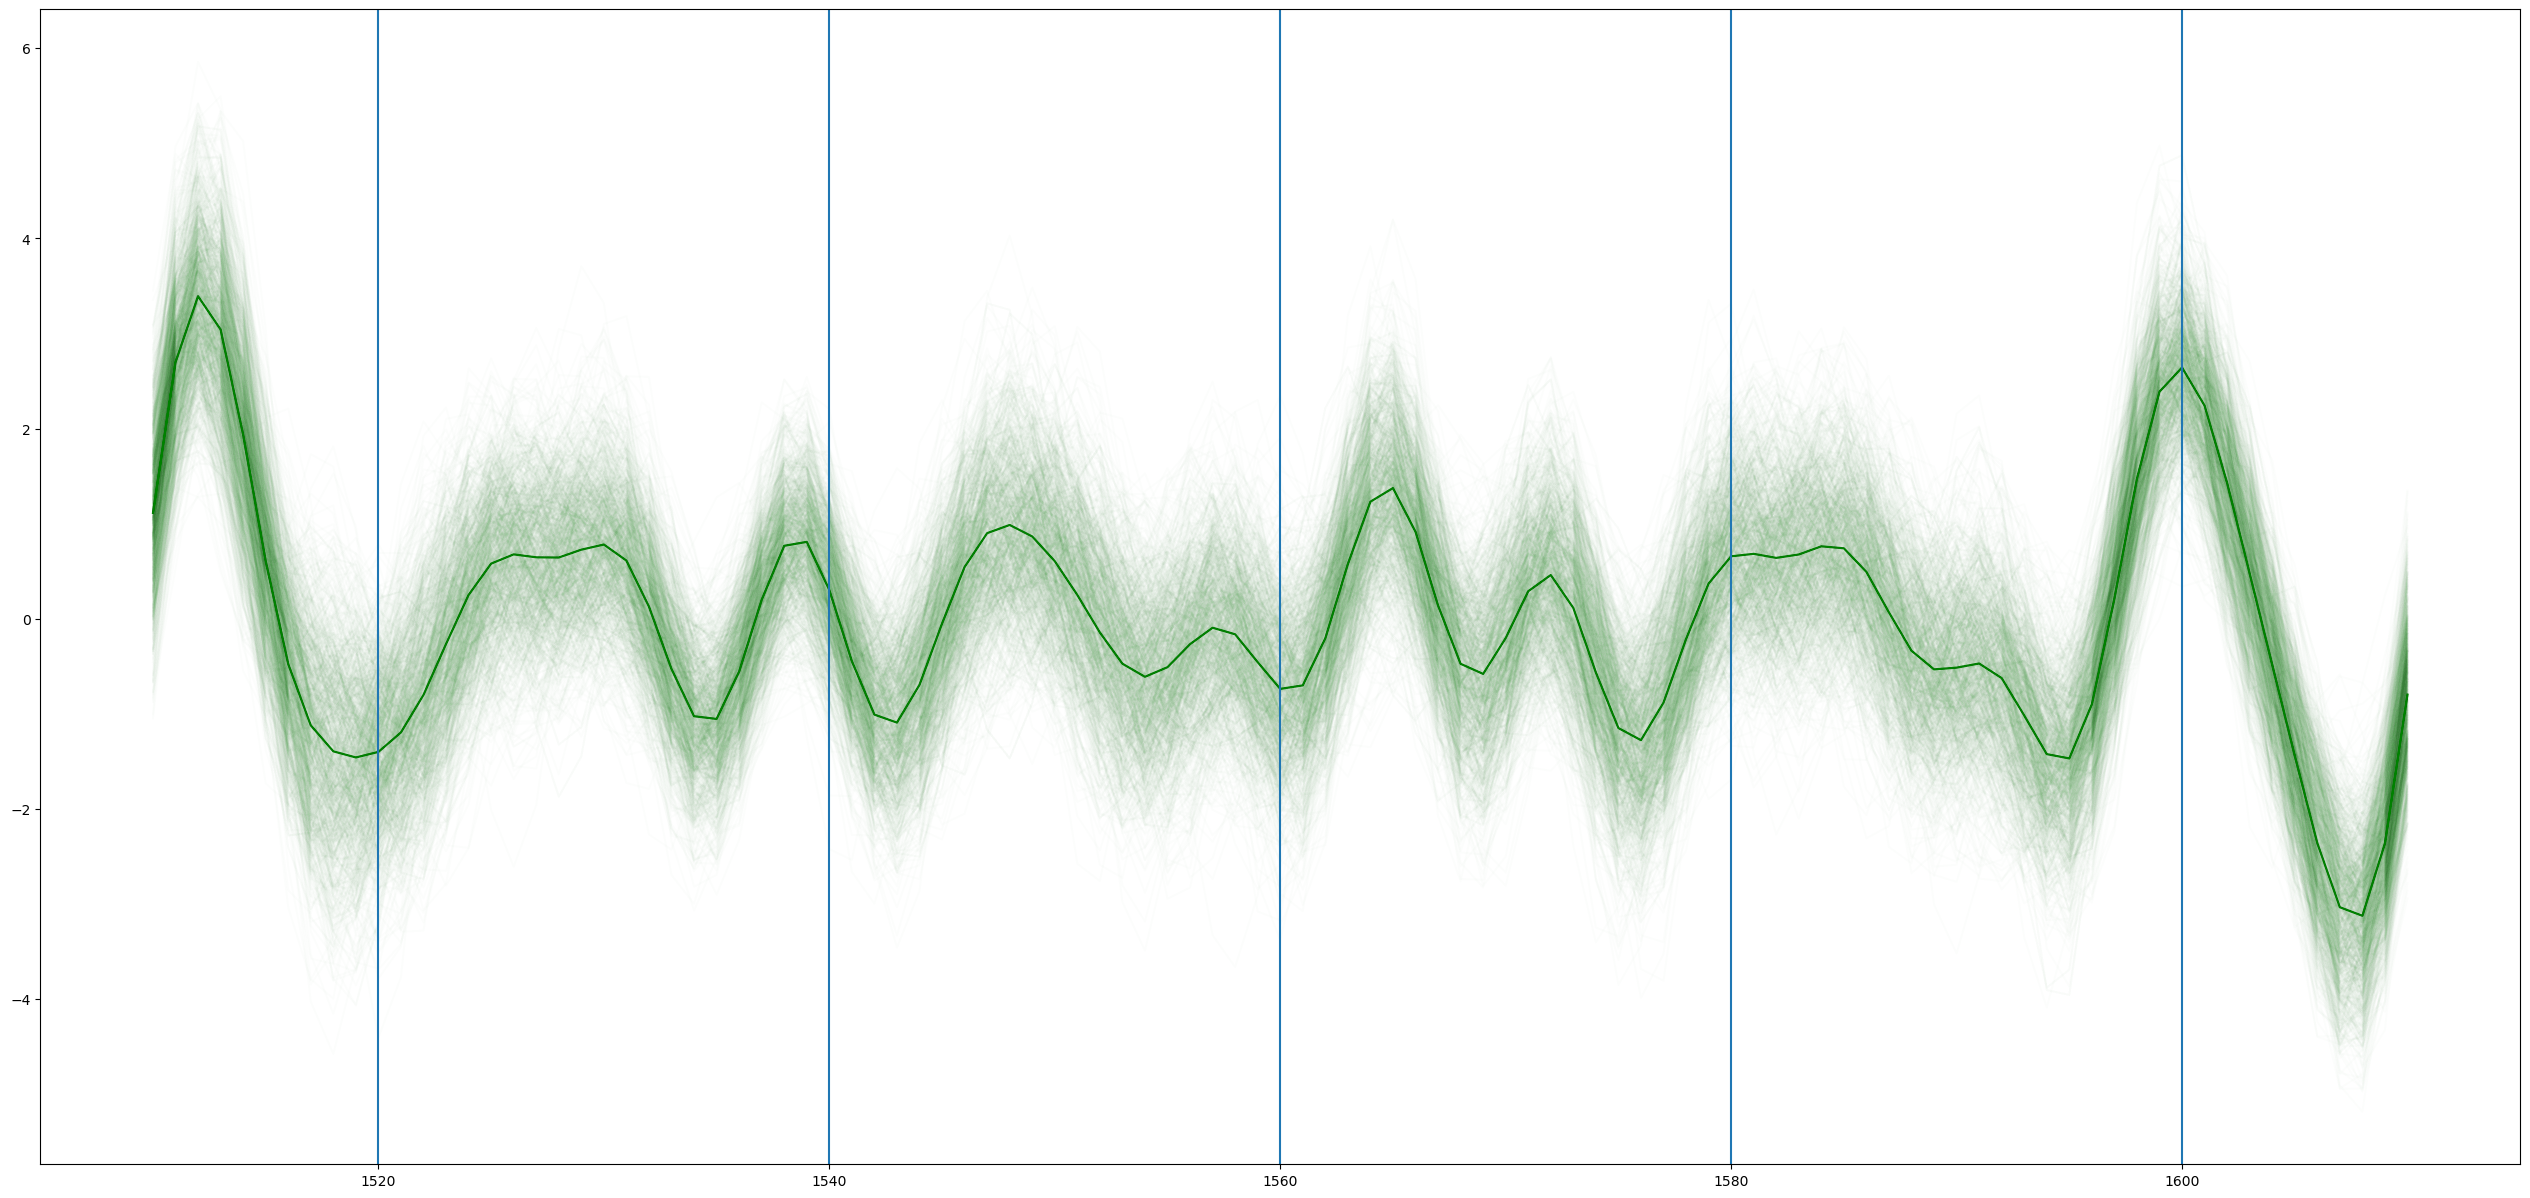

In [8]:
fig, axs = plt.subplots(1, figsize=(32, 15), sharex=True)
axs.plot(resampler.annual, sig, color="g")
for i in np.random.randint(10000, size=1000):
    axs.plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs.axvline(1520)
axs.axvline(1540)
axs.axvline(1560)
axs.axvline(1580)
axs.axvline(1600)

[[ 0.502376    1.76478802  2.54487913 ... -2.35126431 -1.83986781
  -0.82671899]
 [ 1.65304843  3.46328196  3.9219415  ... -3.74035846 -2.78317805
  -0.76003115]
 [ 0.22190102  1.67570318  2.40352694 ... -1.90924845 -1.99474915
  -1.22525742]
 ...
 [ 0.54192889  2.77127872  4.23565982 ... -3.90547353 -3.28978872
  -1.69846889]
 [ 1.5573312   2.29991374  2.0708584  ... -2.64532737 -1.57389418
   0.05768398]
 [ 1.86354993  3.18171838  3.56686352 ... -3.79047198 -2.2388161
  -0.13280284]]


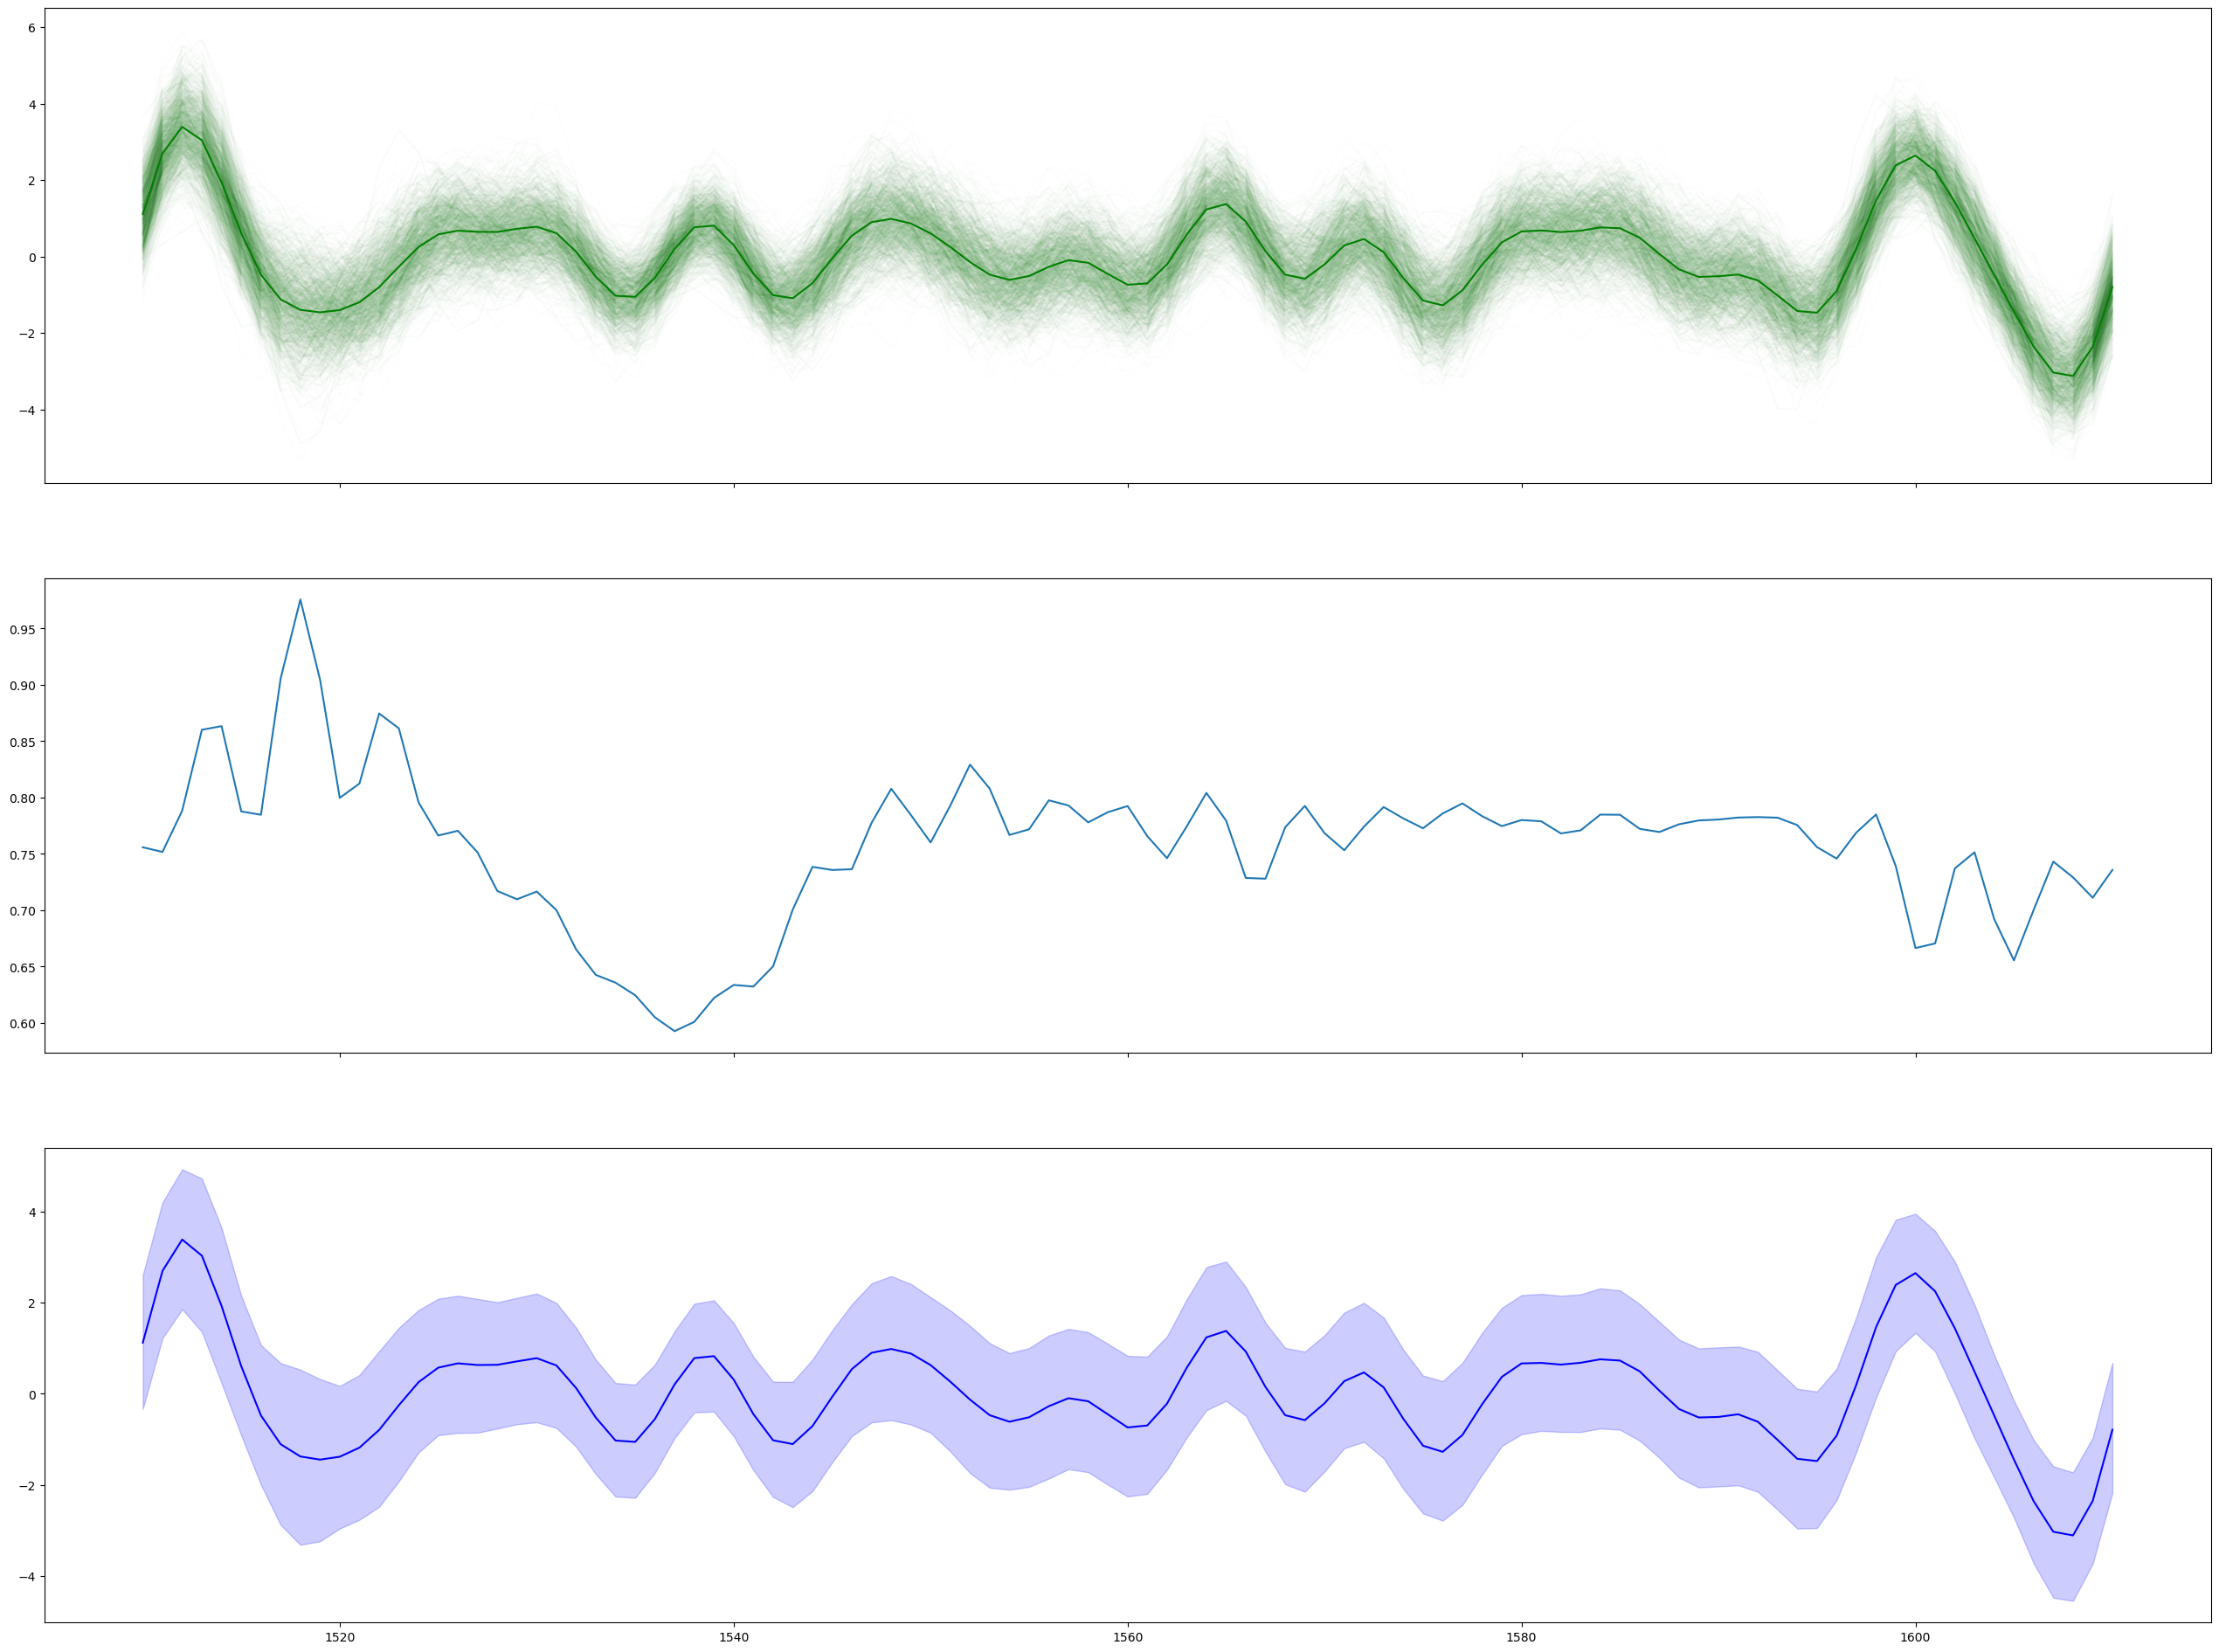

In [10]:
fig, axs = plt.subplots(3, figsize=(32, 24), sharex=True)
for i in np.random.randint(10000, size=1000):
    axs[0].plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs[0].plot(resampler.annual, sig, color="g")
axs[1].plot(resampler.annual, np.std(new_signal, axis=0))
l, m, u = np.percentile(new_signal, (2.5, 50, 97.5 ), axis=0)
axs[2].fill_between(resampler.annual, l, u, color = 'b', alpha=0.2)
axs[2].plot(resampler.annual, m, color = 'b')